In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [3]:
#importar o DF
df = pd.read_csv('vgsales_tratado.csv')
print(df.head())
df.info()


   Unnamed: 0  Posição de venda                      Jogo       Console  \
0           0                 1                Wii Sports  Nintendo Wii   
1           1                 2         Super Mario Bros.  Nintendinho    
2           2                 3            Mario Kart Wii  Nintendo Wii   
3           3                 4         Wii Sports Resort  Nintendo Wii   
4           4                 5  Pokemon Red/Pokemon Blue      Game Boy   

   Ano de Lançamento      Gênero Publicadora  Vendas América do Norte  \
0               2006     Esporte    Nintendo                    41.49   
1               1985  Plataforma    Nintendo                    29.08   
2               2008     Corrida    Nintendo                    15.85   
3               2009     Esporte    Nintendo                    15.75   
4               1996         RPG    Nintendo                    11.27   

   Vendas Europa  Vendas Japão  Vendas outras regiões  Vendas total  
0          29.02          3.77          

/tmp/ipykernel_38325/924050855.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas total', y='Jogo', data=top_jogos, ax=axes[0,0], palette='viridis')
/tmp/ipykernel_38325/924050855.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas total', y='Gênero', data=vendas_genero, ax=axes[1,0], palette='mako')


(np.float64(-1.0999988611502731),
 np.float64(1.099999611538002),
 np.float64(-1.0999996356917652),
 np.float64(1.0999992400937924))

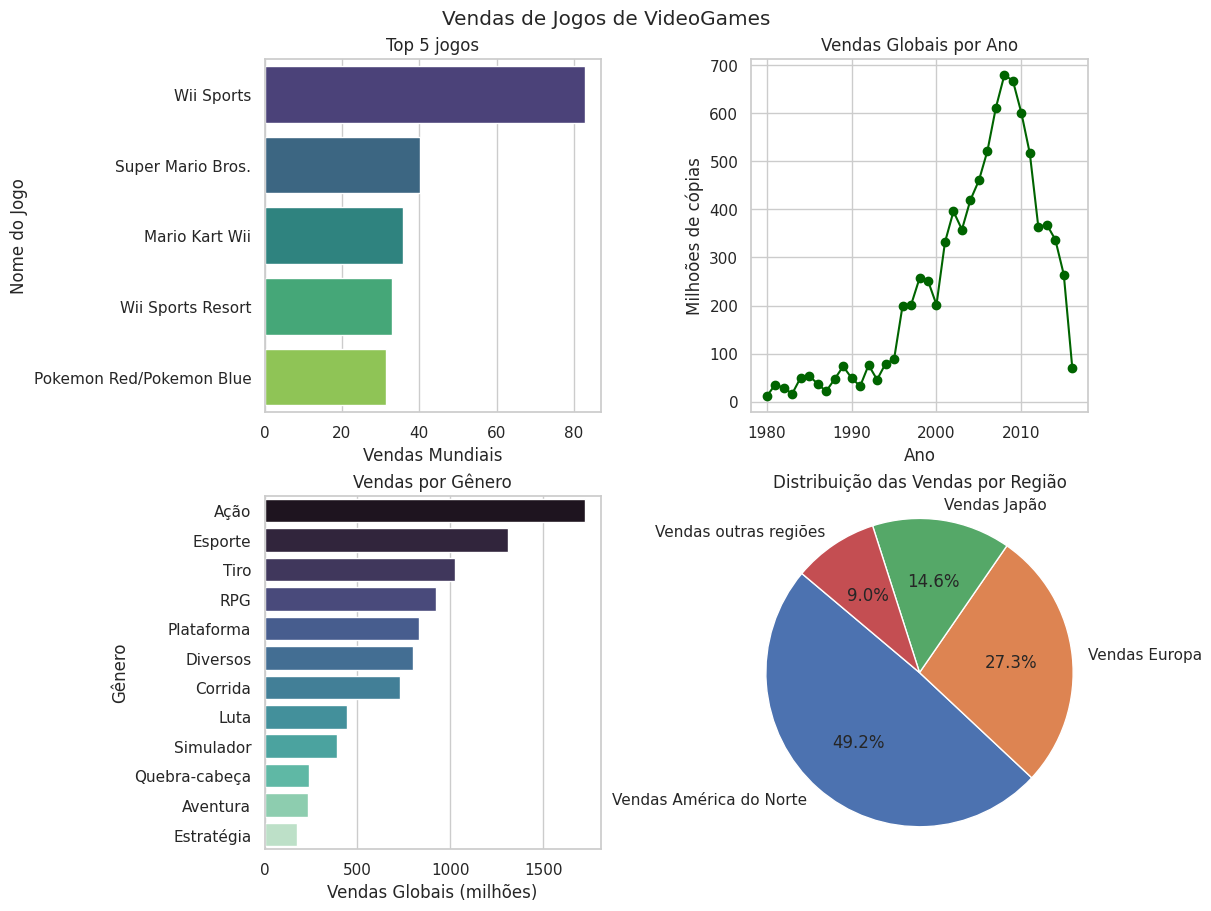

In [11]:
top_jogos = df.sort_values(by='Vendas total', ascending=False).head(5)
vendas_ano = df.groupby('Ano de Lançamento')['Vendas total'].sum()
vendas_genero = df.groupby('Gênero')['Vendas total'].sum().sort_values(ascending=False).reset_index()
vendas_regiao = df[['Vendas América do Norte', 'Vendas Europa', 'Vendas Japão', 'Vendas outras regiões']].sum()

sns.set(style='whitegrid', palette='deep')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9), layout='constrained')
fig.suptitle("Vendas de Jogos de VideoGames")

#top jogos 5
sns.barplot(x='Vendas total', y='Jogo', data=top_jogos, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Top 5 jogos')
axes[0,0].set_xlabel('Vendas Mundiais')
axes[0,0].set_ylabel('Nome do Jogo')

#vendas ano

axes[0,1].plot(vendas_ano.index, vendas_ano.values, marker='o', color='darkgreen')
axes[0,1].set_title('Vendas Globais por Ano')
axes[0,1].set_xlabel('Ano')
axes[0,1].set_ylabel('Milhoões de cópias')
axes[0,1].grid(True)

# vendas por gênero
sns.barplot(x='Vendas total', y='Gênero', data=vendas_genero, ax=axes[1,0], palette='mako')
axes[1,0].set_title('Vendas por Gênero')
axes[1,0].set_xlabel('Vendas Globais (milhões)')
axes[1,0].set_ylabel('Gênero')

#vendas por região
axes[1,1].pie(vendas_regiao, labels=vendas_regiao.index, autopct='%1.1f%%', startangle=140)
axes[1,1].set_title('Distribuição das Vendas por Região')
axes[1,1].axis('equal')